## 1. Import required modules

In [1]:
import h3
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

## 2. Load required data

In [2]:
path_file_1 = '../00-raw data/sent data/Acidentes_ANSR_2019_desafio_lxdatalab_2020_21.xlsx'
path_file_2 = '../00-raw data/sent data/RSB_AcidentesRodoviarios2019.csv'

In [3]:
acidents_file_1 = pd.read_excel(path_file_1)
acidents_file_2 = pd.read_csv(path_file_2, sep=';', encoding='cp1252')

## 3. Evaluate the data

### 3.1. Acidents 1

**`Data shape`**

In [4]:
acidents_file_1.shape

(2768, 37)

**`Data visualization`**

In [5]:
acidents_file_1.head(3).T

,0,1,2
IdAcidente,20191648491,20191648498,20191648520
Datahora,2019:01:02 15:10:00,2019:01:02 16:45:00,2019:01:02 13:05:00
Dia da Semana,Quarta-Feira,Quarta-Feira,Quarta-Feira
Sentidos,NÃO DEFINIDO,NÃO DEFINIDO,NÃO DEFINIDO
Latitude GPS,38.768367,38.719096,38.728779
Longitude GPS,-9.172899,-9.15613,-9.147518
Via Trânsito,Direita,Esquerda,Central
Localizações,Dentro das localidades,Dentro das localidades,Dentro das localidades
Freguesia,Lumiar,Campo de Ourique,Avenidas Novas
Pov. Proxima,Lisboa,Lisboa,Lisboa


**`Data types and missing values`**

In [6]:
acidents_file_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   IdAcidente                2768 non-null   int64  
 1   Datahora                  2768 non-null   object 
 2   Dia da Semana             2768 non-null   object 
 3   Sentidos                  2768 non-null   object 
 4   Latitude GPS              1823 non-null   float64
 5   Longitude GPS             1823 non-null   float64
 6   Via Trânsito              2768 non-null   object 
 7   Localizações              2768 non-null   object 
 8   Freguesia                 2768 non-null   object 
 9   Pov. Proxima              1446 non-null   object 
 10  Tipo Natureza             2768 non-null   object 
 11  Natureza                  2768 non-null   object 
 12  Traçado 1                 2768 non-null   object 
 13  Traçado 2                 2768 non-null   object 
 14  Traçado 

**`Missing values`**

In [7]:
acidents_file_1.isna().sum()

IdAcidente                     0
Datahora                       0
Dia da Semana                  0
Sentidos                       0
Latitude GPS                 945
Longitude GPS                945
Via Trânsito                   0
Localizações                   0
Freguesia                      0
Pov. Proxima                1322
Tipo Natureza                  0
Natureza                       0
Traçado 1                      0
Traçado 2                      0
Traçado 3                      0
Traçado 4                      0
Estado Conservação             0
Características Tecnicas       0
Reg Circulação                 0
Marca Via                      0
Obstáculos                     0
Sinais                         0
Sinais Luminosos               0
Tipo Piso                      0
Intersecção Vias               0
Factores Atmosféricos          0
Luminosidade                   0
Cond Aderência                 0
VM                             0
FG                             0
FL        

1. Existem vários acidentes sem localização de latitue e longitude (possivelmente teremos preencher estes dados usando a restante informação)
2. Numa primeira abordagem vou apenas focar-me nos dados de localização data e tipo de acidente (tipos de acidente diferentes devem ter influencias diferentes)

In [8]:
acidents_file_1.loc[acidents_file_1['Latitude GPS'].isna()].isna().sum()

IdAcidente                    0
Datahora                      0
Dia da Semana                 0
Sentidos                      0
Latitude GPS                945
Longitude GPS               945
Via Trânsito                  0
Localizações                  0
Freguesia                     0
Pov. Proxima                529
Tipo Natureza                 0
Natureza                      0
Traçado 1                     0
Traçado 2                     0
Traçado 3                     0
Traçado 4                     0
Estado Conservação            0
Características Tecnicas      0
Reg Circulação                0
Marca Via                     0
Obstáculos                    0
Sinais                        0
Sinais Luminosos              0
Tipo Piso                     0
Intersecção Vias              0
Factores Atmosféricos         0
Luminosidade                  0
Cond Aderência                0
VM                            0
FG                            0
FL                            0
Tipos Vi

1. Temos aparentemente informação das vias em todos os acidentes que ocorreram e não têm GPS. Possivelmente conseguimos fazer algo com isto.

In [9]:
acidents_file_1.describe()

,IdAcidente,Latitude GPS,Longitude GPS,VM,FG,FL,Km
count,2.768000e+03,1823.000000,1823.000000,2768.000000,2768.000000,2768.000000,249.000000
mean,2.019191e+10,38.733288,-9.150429,0.002890,0.024205,1.177384,4.058783
std,1.372972e+06,0.063683,0.062830,0.053692,0.160612,0.607121,3.264365
min,2.019165e+10,37.017289,-9.413910,0.000000,0.000000,0.000000,0.000000
25%,2.019167e+10,38.718220,-9.170539,0.000000,0.000000,1.000000,1.500000
50%,2.019172e+10,38.734634,-9.150388,0.000000,0.000000,1.000000,3.135000
75%,2.019177e+10,38.751966,-9.135339,0.000000,0.000000,1.000000,6.200000
max,2.020187e+10,38.918566,-7.413290,1.000000,2.000000,9.000000,18.000000


In [10]:
acidents_file_1.describe(include='O').T

,count,unique,top,freq
Datahora,2768,2708,2019:03:22 09:00:00,3
Dia da Semana,2768,7,Sexta-Feira,478
Sentidos,2768,3,NÃO DEFINIDO,1852
Via Trânsito,2768,3,Direita,2025
Localizações,2768,2,Dentro das localidades,2596
Freguesia,2768,24,Avenidas Novas,244
Pov. Proxima,1446,16,Lisboa,1390
Tipo Natureza,2768,3,Colisão,1573
Natureza,2768,17,Atropelamento de peões,640
Traçado 1,2768,3,Recta,2327


In [11]:
acidents_file_1['Pov. Proxima'].value_counts()

Lisboa                                                      1390
Ajuda                                                         29
MONSANTO                                                       6
ALCANTARA                                                      3
Alcântara                                                      3
Lisboa.                                                        3
Alfragide                                                      2
AJUDA.                                                         2
Acesso da rotunda da Expo Ford (Av. Dom João II) ao IC 2       1
Alges                                                          1
Acesso do IP 7 à Rotunda Estr. São Bartolomeu                  1
Ajuda/Monsanto                                                 1
Belém                                                          1
Ajuda/Belém                                                    1
Carnaxide                                                      1
Monsanto.                

1. Temos vários sitios distintos, mas aparentemente a maioria é em Lisboa. Ou seja, esta variável não dá muita informação.

In [12]:
acidents_file_1['Tipo Natureza'].value_counts()

Colisão          1573
Atropelamento     674
Despiste          521
Name: Tipo Natureza, dtype: int64

1. Apenas temos 3 tipos de acidente o que é bom.

### 3.2. Acidents 2

In [13]:
acidents_file_2.shape

(1817, 7)

In [14]:
acidents_file_2.head()

,code,position,freguesia,tipologia,dtregisto,dia_registo,hora_registo
0,42111/O/2019 %ob%367804042019%cb%,"{'coordinates': [-9.14692611215691, 38.7303459...",Avenidas Novas,2102 - Acidentes - Rodoviários - Com viaturas,04/04/2019 02:13,04/04/2019,2
1,60907/O/2019%ob%1161715092019%cb%,"{'coordinates': [-9.15795701650941, 38.7128447...",Estrela,2102 - Acidentes - Rodoviários - Com viaturas,15/09/2019 00:28,15/09/2019,0
2,51303/O/2019 %ob%466825042019%cb%,"{'coordinates': [-9.10134876304967, 38.7442906...",Marvila,2102 - Acidentes - Rodoviários - Com viaturas,25/04/2019 00:01,25/04/2019,0
3,60191/O/2019%ob%1094106092019%cb%,"{'coordinates': [-9.17515018021679, 38.7121700...",Campo de Ourique,2101 - Acidentes - Rodoviários - Atropelamento,06/09/2019 14:27,06/09/2019,14
4,51894/O/2019 %ob%525207052019%cb%,"{'coordinates': [-9.13078619741982, 38.7282074...",Penha de França,2101 - Acidentes - Rodoviários - Atropelamento,07/05/2019 13:11,07/05/2019,13


In [15]:
acidents_file_2.tipologia.value_counts()

2102 - Acidentes - Rodoviários - Com viaturas        1455
2101 - Acidentes - Rodoviários - Atropelamento        185
2103 - Acidentes - Rodoviários - Com Encarcerados     129
2103 - Acidentes - Rodoviários - ComEncarcerados       48
Name: tipologia, dtype: int64

In [35]:
acidents_file_2.isna().sum()

code             0
position         0
freguesia       32
tipologia        0
dtregisto        0
dia_registo      0
hora_registo     0
dtype: int64

## 4. Clean data and add features

### 4.1. User defined functions

In [150]:
def clean_data_1(df):
    clean_df = (
        df
        .pipe(select_columns, ['Datahora', 'Tipo Natureza', 'Latitude GPS', 'Longitude GPS'])
        .pipe(convert_to_datetime, 'Datahora', 1)
        .pipe(remove_nan)
        .pipe(rename_columns)
        .pipe(correct_accident_type, 'accident_type')
        .pipe(add_hour, 'date')
        .pipe(add_weekday, 'date')
        .pipe(add_month, 'date')
        .pipe(add_year_day, 'date')
    )
    return clean_df


def clean_data_2(df):
    clean_df = (
        df
        .pipe(select_columns, ['position', 'tipologia', 'dtregisto'])
        .pipe(add_location, 'position')
        .pipe(rename_columns)
        .pipe(correct_accident_type, 'accident_type')
        .pipe(convert_to_datetime, 'date', 2)
        .pipe(add_hour, 'date')
        .pipe(add_weekday, 'date')
        .pipe(add_month, 'date')
        .pipe(add_year_day, 'date')
    )
    return clean_df


def select_columns(df, columns):
    return df[columns]


def convert_to_datetime(df, date_column, version):
    df = df.copy()
    if version == 1:
        df[date_column] = pd.to_datetime(df[date_column], format='%Y:%m:%d %H:%M:%S')
    elif version == 2:
        df[date_column] = pd.to_datetime(df[date_column], format='%d/%m/%Y %H:%M')
    return df


def remove_nan(df):
    return df.dropna()


def rename_columns(df):
    rename_dict = {'Datahora': 'date',
                   'Tipo Natureza': 'accident_type',
                   'Latitude GPS': 'latitude',
                   'Longitude GPS': 'longitude',
                   'tipologia': 'accident_type',
                   'dtregisto': 'date'}
    return df.rename(columns=rename_dict)


def add_hour(df, date_column):
    df = df.copy()
    df = df.assign(hour = df[date_column].dt.hour)
    return df


def add_weekday(df, date_column):
    df = df.copy()
    df = df.assign(weekday = df[date_column].dt.weekday)
    return df


def add_month(df, date_column):
    df = df.copy()
    df = df.assign(month = df[date_column].dt.month)
    return df


def add_year_day(df, date_column):
    df = df.copy()
    df = df.assign(day_of_year = df[date_column].dt.day_of_year)
    return df


def add_location(df, location_column):
    df = df.copy()
    location = pd.DataFrame(df
                            .position
                            .apply(lambda x: json.loads(x.replace("'", '"'))['coordinates'])
                            .to_list(), 
                            columns=['longitude', 'latitude'])
    df = pd.concat([df, location], axis=1)
    df.drop(columns=['position'], inplace=True)
    return df

def correct_accident_type(df, accident_column):
    rename_dict = {'2102 - Acidentes - Rodoviários - Com viaturas': 'Colisão/Despiste',
                   '2101 - Acidentes - Rodoviários - Atropelamento': 'Atropelamento',
                   '2103 - Acidentes - Rodoviários - Com Encarcerados': 'Colisão/Despiste',
                   '2103 - Acidentes - Rodoviários - ComEncarcerados': 'Colisão/Despiste',
                   'Colisão': 'Colisão/Despiste',
                   'Despiste': 'Colisão/Despiste'}
    return df.replace(rename_dict)
    

In [151]:
clean_acidents_file_1 = clean_data_1(acidents_file_1)
clean_acidents_file_1 = clean_acidents_file_1.assign(version = 1)

In [152]:
clean_acidents_file_2 = clean_data_2(acidents_file_2)
clean_acidents_file_2 = clean_acidents_file_2.assign(version = 2)

In [153]:
pd.concat([clean_acidents_file_1, clean_acidents_file_2]).sort_values(by='date').head(30)

,date,accident_type,latitude,longitude,hour,weekday,month,day_of_year,version
24,2019-01-02 09:50:00,Colisão/Despiste,38.720912,-9.130242,9,2,1,2,1
582,2019-01-02 09:57:00,Colisão/Despiste,38.720890,-9.130158,9,2,1,2,2
25,2019-01-02 12:25:00,Colisão/Despiste,38.738775,-9.157884,12,2,1,2,1
2,2019-01-02 13:05:00,Colisão/Despiste,38.728779,-9.147518,13,2,1,2,1
0,2019-01-02 15:10:00,Atropelamento,38.768367,-9.172899,15,2,1,2,1
18,2019-01-02 15:30:00,Atropelamento,38.705791,-9.205268,15,2,1,2,1
1,2019-01-02 16:45:00,Atropelamento,38.719096,-9.156130,16,2,1,2,1
1626,2019-01-02 17:52:00,Colisão/Despiste,38.756751,-9.112951,17,2,1,2,2
8,2019-01-02 18:50:00,Colisão/Despiste,38.740037,-9.191610,18,2,1,2,1
3,2019-01-03 09:20:00,Atropelamento,38.793481,-9.151816,9,3,1,3,1


Aparentemente não são dados de acidentes repetidos e por isso pordemo sseguir com a analise usando os dados todos que temos neste momento.

In [69]:
accidents = pd.concat([clean_acidents_file_1, clean_acidents_file_2]).sort_values(by='date')

In [87]:
accidents.describe()

,latitude,longitude,hour,weekday,month,version
count,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000
mean,38.722698,-9.139740,13.697527,2.887088,7.308791,1.499176
std,0.795377,0.794746,5.703154,1.901287,3.529132,0.500068
min,-9.163787,-9.413910,0.000000,0.000000,1.000000,1.000000
25%,38.718469,-9.172591,9.000000,1.000000,4.000000,1.000000
50%,38.736720,-9.151863,14.000000,3.000000,8.000000,1.000000
75%,38.754752,-9.135281,18.000000,4.000000,10.000000,2.000000
max,38.918566,38.704550,23.000000,6.000000,12.000000,2.000000


<AxesSubplot:xlabel='longitude'>

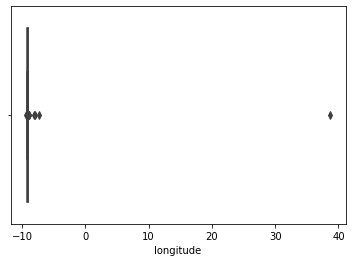

In [88]:
sns.boxplot(data=accidents, x='longitude')

Parece que temos um dado errado de localização, que temos de remover.

In [106]:
accidents = accidents.query('longitude < -9 and longitude > -9.30')

<AxesSubplot:xlabel='longitude'>

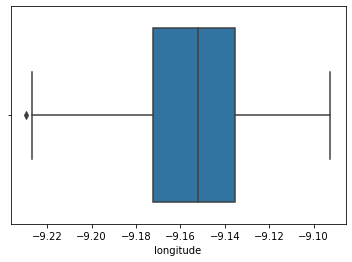

In [107]:
sns.boxplot(data=accidents, x='longitude')

<AxesSubplot:xlabel='latitude'>

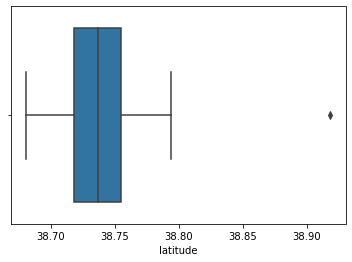

In [111]:
sns.boxplot(data=accidents, x='latitude')

In [112]:
accidents = accidents.query('latitude < 38.85')

<AxesSubplot:xlabel='latitude'>

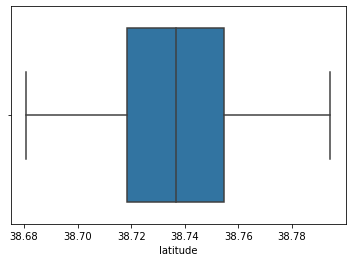

In [113]:
sns.boxplot(data=accidents, x='latitude')

## 5. Graphical visualization

### 5.1. User defined functions

In [15]:
def add_h3_hexes(cab_data, aperture_size):
    """ Adds the h3 hex location designation to the cab data frame. """

    cab_data_w_h3_hex = (
        cab_data
        .assign(h3_hex=cab_data.apply(lambda x: h3.geo_to_h3(x.latitude, x.longitude, aperture_size), 1))
    )

    return cab_data_w_h3_hex


def visualize_hexagons(hexagons, color="red", folium_map=None):
    """
    hexagons is a list of hexcluster. Each hexcluster is a list of hexagons.
    eg. [[hex1, hex2], [hex3, hex4]]
    """
    polylines = []
    lat = []
    lng = []
    for hex in hexagons:
        polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)
        # flatten polygons into loops.
        outlines = [loop for polygon in polygons for loop in polygon]
        polyline = [outline + [outline[0]] for outline in outlines][0]
        lat.extend(map(lambda v: v[0], polyline))
        lng.extend(map(lambda v: v[1], polyline))
        polylines.append(polyline)

    if folium_map is None:
        m = folium.Map(location=[sum(lat) / len(lat), sum(lng) / len(lng)], zoom_start=13, tiles='cartodbpositron')
    else:
        m = folium_map
    for polyline in polylines:
        my_PolyLine = folium.PolyLine(locations=polyline, weight=8, color=color)
        m.add_child(my_PolyLine)
    return m

### 5.2. Visual exploration of the data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

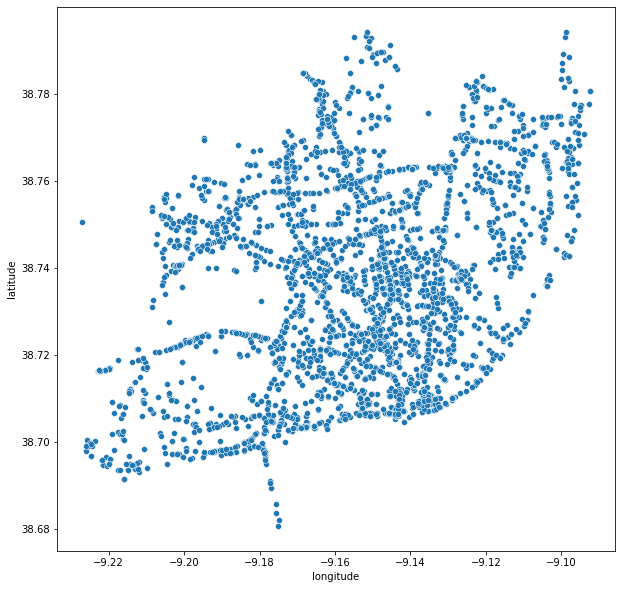

In [116]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=accidents, y='latitude', x='longitude')

<AxesSubplot:xlabel='hour', ylabel='percentage'>

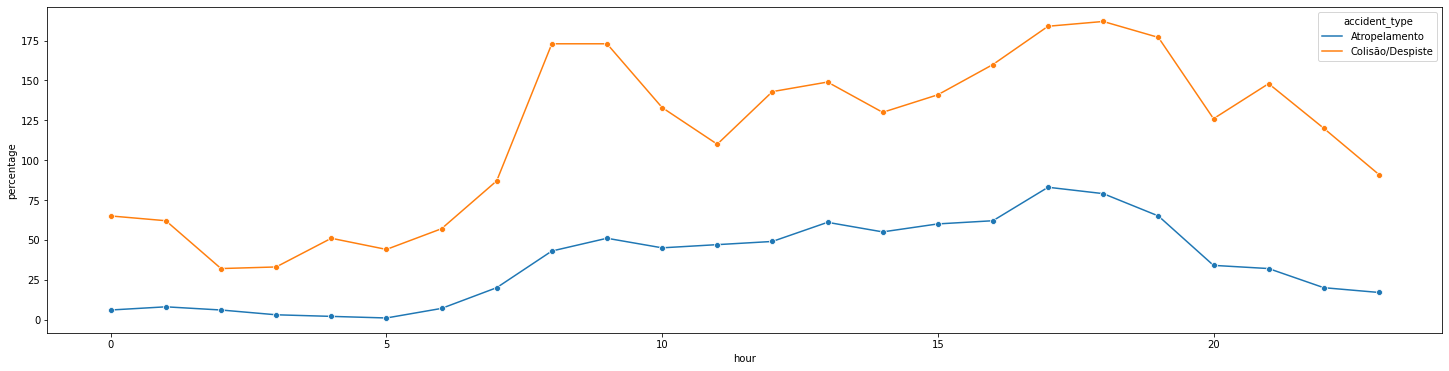

In [117]:
hour_counting = accidents.groupby(['hour', 'accident_type']).agg(percentage = ('date', np.size))
plt.figure(figsize = (25, 6))
sns.lineplot(data = hour_counting, x='hour', y='percentage', hue='accident_type', marker='o')

Principais pontos:
1. Existem muitos menos acidentes por despiste do que atropelamentos e colisões;
2. Para todos os casos existe uma parte do dia (entre as 0 e 6 da manhã em que o número diminui bastante);
3. Aparentemente existem também 3 picos (mais claros para os atropelamentos e colisões) na parte da manhã (8-9), tarde (12-14) e final da tarde (16-18);
4. Para ter uma melhor noção dos acidentes necessitamos de avaliar em proporção... Porque assim estamos a ver dados influenciados pelo número de ocorrencas.

<AxesSubplot:xlabel='hour', ylabel='percentage'>

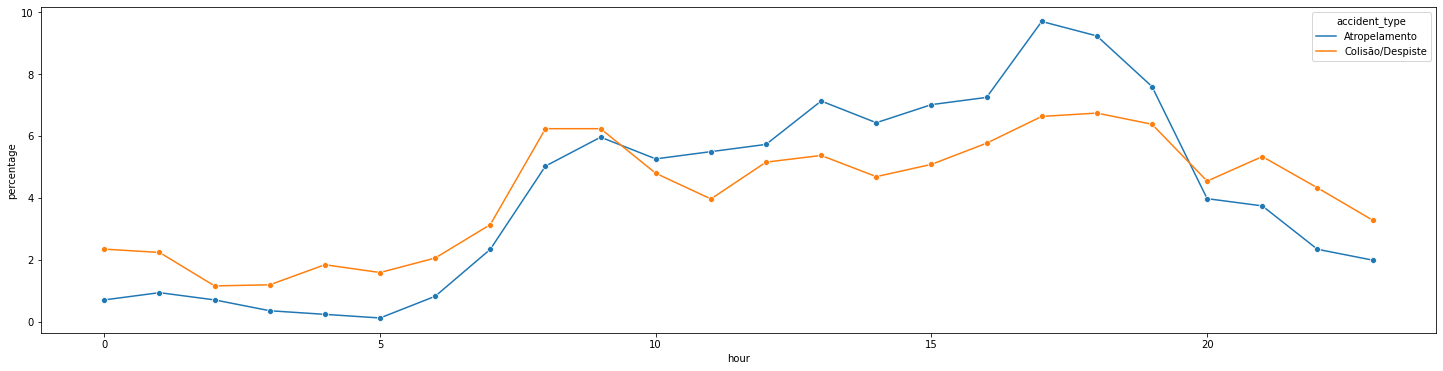

In [118]:
hour_counting = hour_counting.groupby('accident_type').apply(lambda x: 100 * x / float(x.sum())).reset_index()
plt.figure(figsize = (25, 6))
sns.lineplot(data = hour_counting, x='hour', y='percentage', hue='accident_type', marker='o')

Principais pontos:
1. Continuamos a ver os diferentes comportamentos indicados anteriormente, contudo os picos do final da tarde de atropelamentos e colisão continua bastante visivel;
2. O facto interessante é o de despistes. Aparentemente há um pico de despistes a partir das 20 horas (jantares em que se bebe demais?)

<AxesSubplot:xlabel='weekday', ylabel='percentage'>

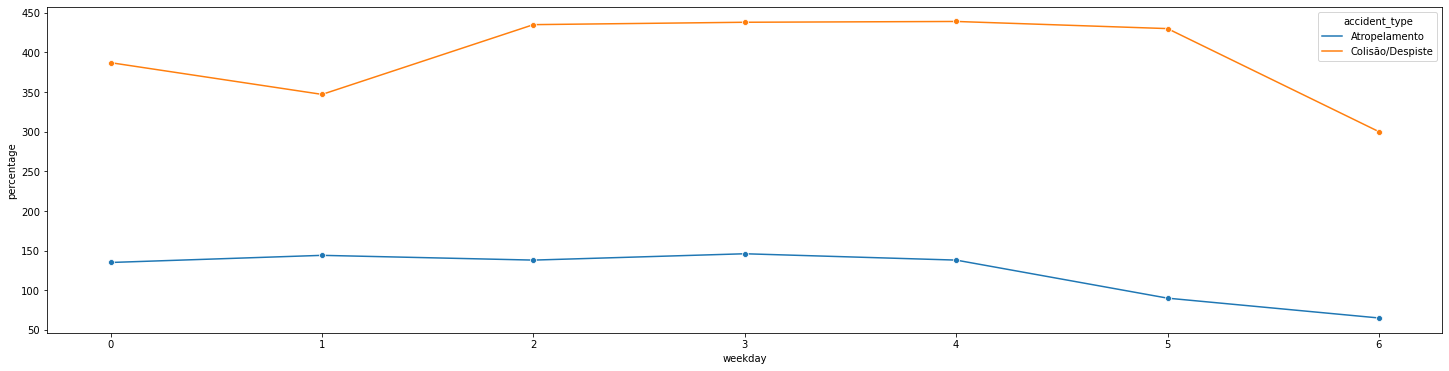

In [119]:
weekday_counting = accidents.groupby(['weekday', 'accident_type']).agg(percentage = ('date', np.size))
plt.figure(figsize = (25, 6))
sns.lineplot(data = weekday_counting, x='weekday', y='percentage', hue='accident_type', marker='o')

Principais pontos:
1. Como seria esperado existe uma diminuiçaõ de acidentes ao sabado e domingo (5 e 6);
2. O pico de colisões curiosamente ocorre à sexta-feira. Pessoas desejosas de chegar a casa ou dia de saidas à noite?
3. Como na analise de horas temos de avaliar estes dados em termos de racio para tirar outras conclusões;

<AxesSubplot:xlabel='weekday', ylabel='percentage'>

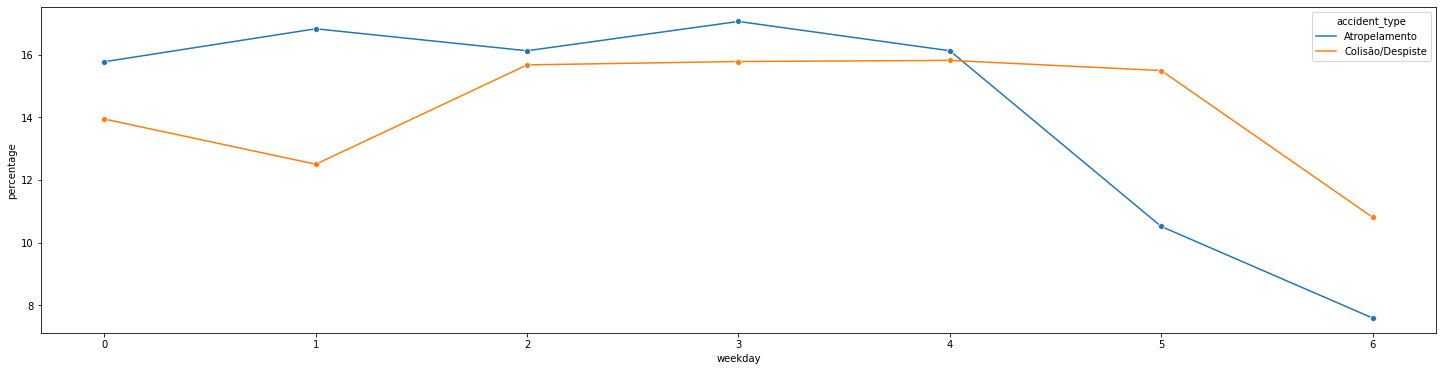

In [120]:
weekday_counting = weekday_counting.groupby('accident_type').apply(lambda x: 100 * x / float(x.sum())).reset_index()
plt.figure(figsize = (25, 6))
sns.lineplot(data = weekday_counting, x='weekday', y='percentage', hue='accident_type', marker='o')

Principais pontos:
1. Temos um pico de despistes aos sabados (5);
2. Contudo tenho de analisar a combinação de dias e horas para perceber se existe algum padrão.

<AxesSubplot:xlabel='month', ylabel='percentage'>

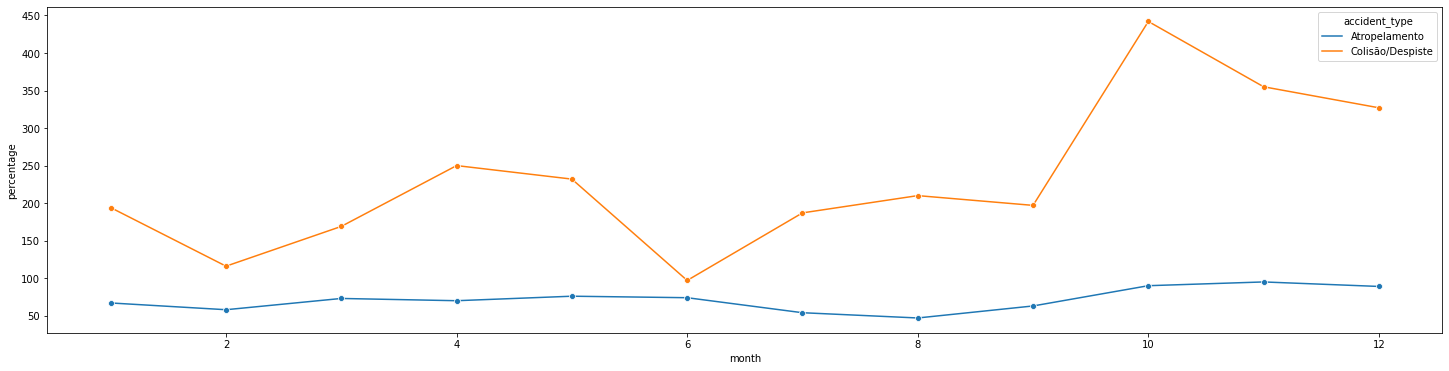

In [121]:
month_counting = accidents.groupby(['month', 'accident_type']).agg(percentage = ('date', np.size))
plt.figure(figsize = (25, 6))
sns.lineplot(data = month_counting, x='month', y='percentage', hue='accident_type', marker='o')

<AxesSubplot:xlabel='month', ylabel='percentage'>

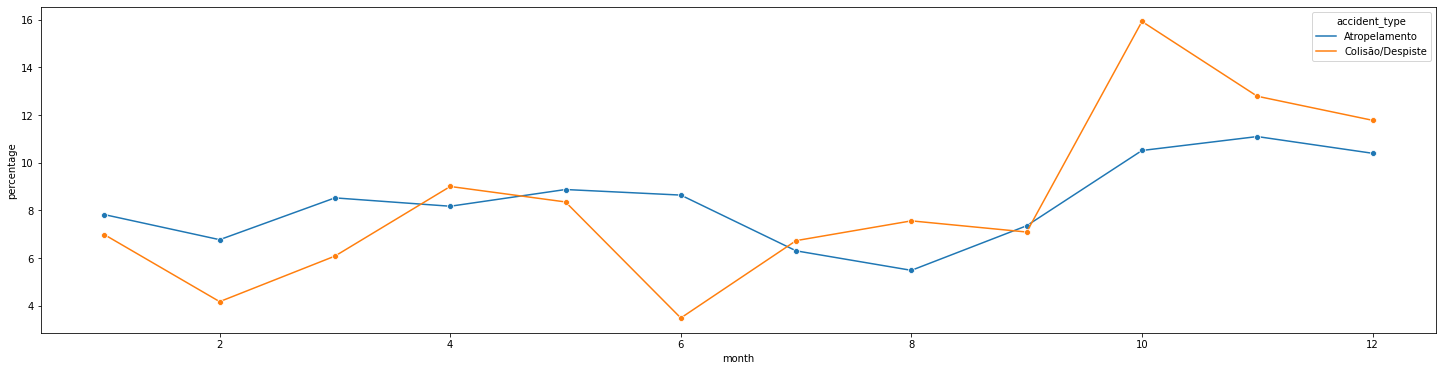

In [122]:
month_counting = month_counting.groupby('accident_type').apply(lambda x: 100 * x / float(x.sum())).reset_index()
plt.figure(figsize = (25, 6))
sns.lineplot(data = month_counting, x='month', y='percentage', hue='accident_type', marker='o')

**`Atropelamentos`**

<AxesSubplot:xlabel='hour', ylabel='weekday'>

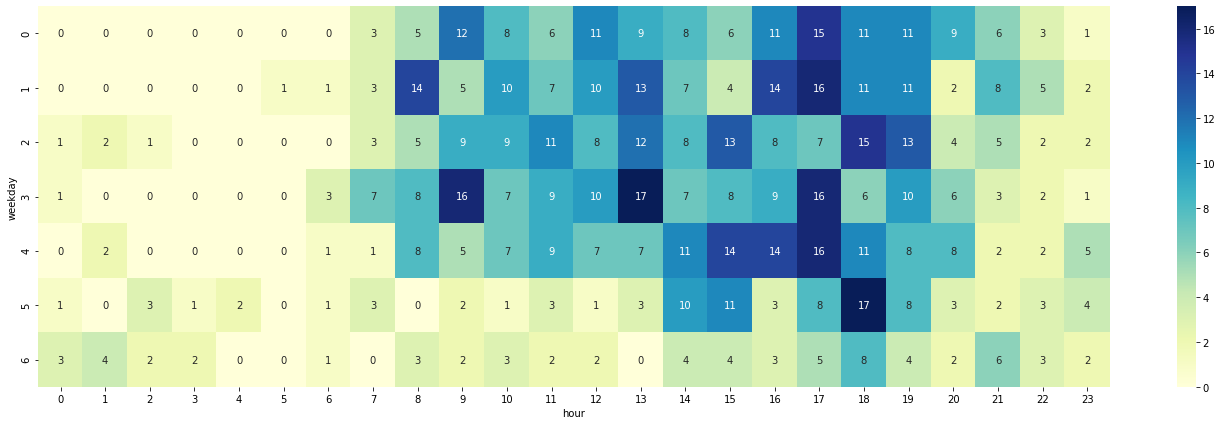

In [124]:
plt.figure(figsize=(24, 7))
atropelamentos = accidents.query('accident_type == "Atropelamento"')
heatmap_data = pd.pivot_table(atropelamentos, index='weekday', columns='hour', values='accident_type', aggfunc=np.size, fill_value=0)
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")

**`Colisão/Despiste`**

<AxesSubplot:xlabel='hour', ylabel='weekday'>

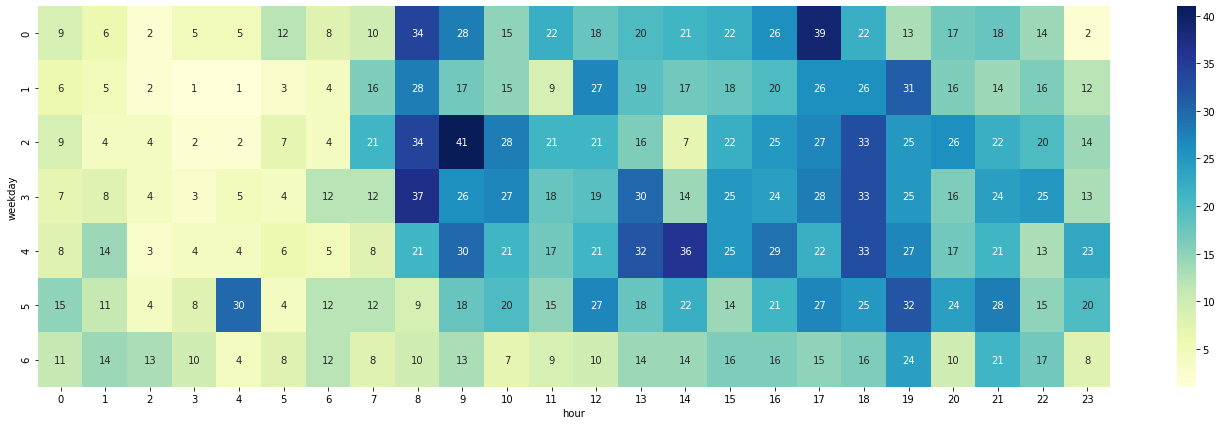

In [85]:
plt.figure(figsize=(24, 7))
colisao_despiste = accidents.query('accident_type == "Colisão/Despiste"')
heatmap_data = pd.pivot_table(colisao_despiste, index='weekday', columns='hour', values='accident_type', aggfunc=np.size, fill_value=0)
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", )

### 5.3. Accidents on the map

In [97]:
def add_h3_hexes(cab_data, aperture_size):
    """ Adds the h3 hex location designation to the cab data frame. """

    cab_data_w_h3_hex = (
        cab_data
        .assign(h3_hex=cab_data.apply(lambda x: h3.geo_to_h3(x.latitude, x.longitude, aperture_size), 1))
    )

    return cab_data_w_h3_hex

def visualize_hexagons(hexagons, color="red", folium_map=None):
    """
    hexagons is a list of hexcluster. Each hexcluster is a list of hexagons.
    eg. [[hex1, hex2], [hex3, hex4]]
    """
    polylines = []
    lat = []
    lng = []
    for hex in hexagons:
        polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)
        # flatten polygons into loops.
        outlines = [loop for polygon in polygons for loop in polygon]
        polyline = [outline + [outline[0]] for outline in outlines][0]
        lat.extend(map(lambda v: v[0], polyline))
        lng.extend(map(lambda v: v[1], polyline))
        polylines.append(polyline)

    if folium_map is None:
        m = folium.Map(location=[sum(lat) / len(lat), sum(lng) / len(lng)], zoom_start=13, tiles='cartodbpositron')
    else:
        m = folium_map
    for polyline in polylines:
        my_PolyLine = folium.PolyLine(locations=polyline, weight=8, color=color)
        m.add_child(my_PolyLine)
    return m


In [269]:
accidents_with_hexes = add_h3_hexes(accidents, 9)

In [278]:
m = visualize_hexagons(accidents_with_hexes.h3_hex.value_counts().head(1).index)
display(m)

In [277]:
accidents_with_hexes.h3_hex.value_counts().head(1)

8939337586fffff    49
Name: h3_hex, dtype: int64

# Cruzar com os dados atmosféricos

In [154]:
weather = pd.read_csv('../00-raw data/POWER_Regional_Daily_20190101_20191231_9c24c3cf.csv', sep=',', skiprows=19)

In [158]:
weather['date'] = pd.to_datetime(weather['YEAR'].astype(str) + '-' + weather['MO'].astype(str) + '-' + weather['DY'].astype(str))

In [162]:
weather['date_str'] = weather.date.dt.strftime('%Y%m%d')

In [163]:
accidents_weather = accidents

In [165]:
accidents_weather['date_str'] = accidents_weather.date.dt.strftime('%Y%m%d')

In [170]:
accidents_per_day = accidents_weather.groupby('date_str').agg(n = ('accident_type', np.size)).reset_index()

In [181]:
accidents_weather.merge(weather[['date_str', 'PRECTOT']])

,date,accident_type,latitude,longitude,hour,weekday,month,version,date_str,PRECTOT
0,2019-01-02 09:50:00,Colisão/Despiste,38.720912,-9.130242,9,2,1,1,20190102,0.01
1,2019-01-02 09:57:00,Colisão/Despiste,38.720890,-9.130158,9,2,1,2,20190102,0.01
2,2019-01-02 12:25:00,Colisão/Despiste,38.738775,-9.157884,12,2,1,1,20190102,0.01
3,2019-01-02 13:05:00,Colisão/Despiste,38.728779,-9.147518,13,2,1,1,20190102,0.01
4,2019-01-02 15:10:00,Atropelamento,38.768367,-9.172899,15,2,1,1,20190102,0.01
...,...,...,...,...,...,...,...,...,...,...
3627,2019-12-30 19:51:00,Colisão/Despiste,38.710238,-9.153392,19,0,12,2,20191230,0.00
3628,2019-12-31 00:38:00,Colisão/Despiste,38.743859,-9.195918,0,1,12,1,20191231,0.00
3629,2019-12-31 13:28:00,Colisão/Despiste,38.715007,-9.166045,13,1,12,1,20191231,0.00
3630,2019-12-31 15:19:00,Colisão/Despiste,38.748713,-9.118734,15,1,12,2,20191231,0.00


In [174]:
teste = accidents_per_day.merge(weather)

<AxesSubplot:xlabel='n', ylabel='PRECTOT'>

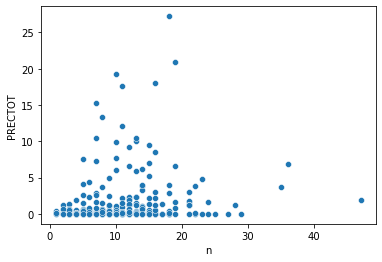

In [176]:
sns.scatterplot(data=teste, x='n', y='PRECTOT')

In [179]:
teste.corr(method='spearman')

,n,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,RH2M,PS,T2M_MAX,T2M_MIN,T2M,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN
n,1.000000,NaN,NaN,NaN,0.354878,-0.036616,0.212759,0.014824,0.126179,-0.135217,-0.101580,0.007527,-0.050682,-0.187322,-0.278281
LAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MO,0.354878,NaN,NaN,NaN,1.000000,0.004599,0.186165,0.480026,0.221737,-0.242252,0.264709,0.460678,0.365505,-0.107749,-0.187824
DY,-0.036616,NaN,NaN,NaN,0.004599,1.000000,0.016563,0.086596,0.057108,0.014620,0.085532,0.041998,0.076423,0.029281,0.007280
PRECTOT,0.212759,NaN,NaN,NaN,0.186165,0.016563,1.000000,0.194739,0.612172,-0.363570,-0.355669,0.061183,-0.137191,-0.557403,-0.484115
QV2M,0.014824,NaN,NaN,NaN,0.480026,0.086596,0.194739,1.000000,0.287698,-0.406966,0.717427,0.897767,0.834923,0.044604,0.222009
RH2M,0.126179,NaN,NaN,NaN,0.221737,0.057108,0.612172,0.287698,1.000000,0.004994,-0.372531,-0.048594,-0.239246,-0.517778,-0.649602
PS,-0.135217,NaN,NaN,NaN,-0.242252,0.014620,-0.363570,-0.406966,0.004994,1.000000,-0.262123,-0.454554,-0.396732,0.058681,-0.183667


# Cruzar com dia e noite

In [222]:
day_night = pd.read_excel('../00-raw data/Por do sol.xlsx')

In [223]:
day_night = (
    day_night
    
    .assign(clean_sunrise = lambda x: '2019-' + x['Month'].astype(str) + '-' + x['Day'].astype(str) + ' ' + x['Sunrise'].str.split().str[0])
    .assign(clean_sunrise = lambda x: pd.to_datetime(x['clean_sunrise'], format='%Y-%m-%d %H:%M'))
    .drop(columns = 'Sunrise')
    
    .assign(clean_sunset = lambda x: '2019-' + x['Month'].astype(str) + '-' + x['Day'].astype(str) + ' ' + x['Sunset'].str.split().str[0])
    .assign(clean_sunset = lambda x: pd.to_datetime(x['clean_sunset'], format='%Y-%m-%d %H:%M'))
    .drop(columns = 'Sunset')
    
    .assign(date_str = lambda x: pd.to_datetime('2019-' + x['Month'].astype(str) + '-' + x['Day'].astype(str)).dt.strftime('%Y%m%d'))
    .drop(columns = ['Month', 'Day'])
)

In [224]:
accidents_light = accidents_weather.merge(day_night, on='date_str', how='left')

In [230]:
accidents_light['day_night'] = 'day'
accidents_light.loc[(accidents_light['date'] < accidents_light['clean_sunrise']) |
                    (accidents_light['date'] > accidents_light['clean_sunset']), 'day_night'] = 'night'
accidents_light

,date,accident_type,latitude,longitude,hour,weekday,month,version,date_str,clean_sunrise,clean_sunset,day_night
0,2019-01-02 09:50:00,Colisão/Despiste,38.720912,-9.130242,9,2,1,1,20190102,2019-01-02 07:34:00,2019-01-02 17:29:00,day
1,2019-01-02 09:57:00,Colisão/Despiste,38.720890,-9.130158,9,2,1,2,20190102,2019-01-02 07:34:00,2019-01-02 17:29:00,day
2,2019-01-02 12:25:00,Colisão/Despiste,38.738775,-9.157884,12,2,1,1,20190102,2019-01-02 07:34:00,2019-01-02 17:29:00,day
3,2019-01-02 13:05:00,Colisão/Despiste,38.728779,-9.147518,13,2,1,1,20190102,2019-01-02 07:34:00,2019-01-02 17:29:00,day
4,2019-01-02 15:10:00,Atropelamento,38.768367,-9.172899,15,2,1,1,20190102,2019-01-02 07:34:00,2019-01-02 17:29:00,day
...,...,...,...,...,...,...,...,...,...,...,...,...
3627,2019-12-30 19:51:00,Colisão/Despiste,38.710238,-9.153392,19,0,12,2,20191230,2019-12-30 07:33:00,2019-12-30 17:27:00,night
3628,2019-12-31 00:38:00,Colisão/Despiste,38.743859,-9.195918,0,1,12,1,20191231,2019-12-31 07:34:00,2019-12-31 17:27:00,night
3629,2019-12-31 13:28:00,Colisão/Despiste,38.715007,-9.166045,13,1,12,1,20191231,2019-12-31 07:34:00,2019-12-31 17:27:00,day
3630,2019-12-31 15:19:00,Colisão/Despiste,38.748713,-9.118734,15,1,12,2,20191231,2019-12-31 07:34:00,2019-12-31 17:27:00,day


In [231]:
accidents_light.day_night.value_counts()

day      2409
night    1223
Name: day_night, dtype: int64

1. Mais uma vez pode ser por causa do maior fluxo de carros. 
2. Precisamos de uma normalização de fluxo de automoveis para conseguir analisar bem a influência de outros fatores.

# Analisar dados de waze

In [232]:
waze = pd.read_csv('../00-raw data/waze_jams_20190101_20200630.csv')

In [235]:
waze.head().T

,0,1,2,3,4
bbox,"-9.149844,38.738675,-9.148286,38.738913","-9.202781,38.734172,-9.202317,38.734343","-9.201714,38.70103,-9.200505,38.701452","-9.147109,38.729467,-9.145892,38.729919","-9.137746,38.743447,-9.13385,38.744505"
city,Lisboa {Avenidas Novas},Lisboa {Alto da Boavista},Lisboa {Ajuda},Lisboa {Picoas},Lisboa {S. João de Deus}
country,PO,PO,PO,PO,PO
delay,-1.0,-1.0,-1.0,-1.0,62.0
endNode,NULL,NULL,NULL,NULL,NULL
endnode,Av. 5 de Outubro,Est. do Outeiro,R. Gen. Massano de Amorim,Av. Fontes Pereira de Melo,Av. de S. João de Deus
entity_id,EMEL.waze.jams.2107486134,EMEL.waze.jams.1491397219,EMEL.waze.jams.1898239485,EMEL.waze.jams.1898098006,EMEL.waze.jams.297357948
entity_location,"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]"
entity_ts,1546300954750.0,1546300954830.0,1546300954852.0,1546300954935.0,1546300954961.0
entity_type,EMEL.waze.jams,EMEL.waze.jams,EMEL.waze.jams,EMEL.waze.jams,EMEL.waze.jams


In [274]:
teste[['bbox', 'position']]

,bbox,position
0,"-9.149844,38.738675,-9.148286,38.738913","{""type"": ""GeometryCollection"", ""geometries"": [..."
1,"-9.202781,38.734172,-9.202317,38.734343","{""type"": ""GeometryCollection"", ""geometries"": [..."
2,"-9.201714,38.70103,-9.200505,38.701452","{""type"": ""GeometryCollection"", ""geometries"": [..."
3,"-9.147109,38.729467,-9.145892,38.729919","{""type"": ""GeometryCollection"", ""geometries"": [..."
4,"-9.137746,38.743447,-9.13385,38.744505","{""type"": ""GeometryCollection"", ""geometries"": [..."
...,...,...
95,"-9.15666,38.729535,-9.152816,38.731584","{""type"": ""GeometryCollection"", ""geometries"": [..."
96,"-9.125101,38.711768,-9.124253,38.712206","{""type"": ""GeometryCollection"", ""geometries"": [..."
97,"-9.137554,38.708116,-9.135964,38.708508","{""type"": ""GeometryCollection"", ""geometries"": [..."
98,"-9.135398,38.707064,-9.13315,38.70758","{""type"": ""GeometryCollection"", ""geometries"": [..."


In [276]:
print(teste.position[])

{"type": "GeometryCollection", "geometries": [{"coordinates": [[[-9.202781, 38.734343], [-9.202317, 38.734172]]], "type": "MultiLineString"}]}


In [237]:
teste = waze[:100]

In [247]:
teste.bbox.str.split(',')

0     [-9.149844, 38.738675, -9.148286, 38.738913]
1     [-9.202781, 38.734172, -9.202317, 38.734343]
2      [-9.201714, 38.70103, -9.200505, 38.701452]
3     [-9.147109, 38.729467, -9.145892, 38.729919]
4      [-9.137746, 38.743447, -9.13385, 38.744505]
                          ...                     
95     [-9.15666, 38.729535, -9.152816, 38.731584]
96    [-9.125101, 38.711768, -9.124253, 38.712206]
97    [-9.137554, 38.708116, -9.135964, 38.708508]
98      [-9.135398, 38.707064, -9.13315, 38.70758]
99    [-9.094849, 38.774718, -9.092267, 38.774931]
Name: bbox, Length: 100, dtype: object

In [256]:
( 
    teste
    .assign(date = pd.to_datetime(teste['entity_ts'], unit='ms'))
    .assign(hour = lambda x: x['date'].dt.hour)
#     .groupby('hour')
#     .agg(mean = ('level', np.mean))
)

,bbox,city,country,delay,endNode,endnode,entity_id,entity_location,entity_ts,entity_type,...,roadType,roadtype,street,turnType,turntype,typeEntity,typeentity,validity_ts,date,hour
0,"-9.149844,38.738675,-9.148286,38.738913",Lisboa {Avenidas Novas},PO,-1.0,NULL,Av. 5 de Outubro,EMEL.waze.jams.2107486134,"[0.0, 0.0]",1.546301e+12,EMEL.waze.jams,...,0.0,1.0,Av. Elias Garcia,NULL,NONE,NULL,NONE,1.546301e+12,2019-01-01 00:02:34.750000128,0
1,"-9.202781,38.734172,-9.202317,38.734343",Lisboa {Alto da Boavista},PO,-1.0,NULL,Est. do Outeiro,EMEL.waze.jams.1491397219,"[0.0, 0.0]",1.546301e+12,EMEL.waze.jams,...,0.0,1.0,NULL,NULL,NONE,NULL,NONE,1.546301e+12,2019-01-01 00:02:34.830000128,0
2,"-9.201714,38.70103,-9.200505,38.701452",Lisboa {Ajuda},PO,-1.0,NULL,R. Gen. Massano de Amorim,EMEL.waze.jams.1898239485,"[0.0, 0.0]",1.546301e+12,EMEL.waze.jams,...,0.0,1.0,R. Gen. João de Almeida,NULL,NONE,NULL,NONE,1.546301e+12,2019-01-01 00:02:34.852000000,0
3,"-9.147109,38.729467,-9.145892,38.729919",Lisboa {Picoas},PO,-1.0,NULL,Av. Fontes Pereira de Melo,EMEL.waze.jams.1898098006,"[0.0, 0.0]",1.546301e+12,EMEL.waze.jams,...,0.0,1.0,R. Andrade Corvo,NULL,NONE,NULL,NONE,1.546301e+12,2019-01-01 00:02:34.935000064,0
4,"-9.137746,38.743447,-9.13385,38.744505",Lisboa {S. João de Deus},PO,62.0,NULL,Av. de S. João de Deus,EMEL.waze.jams.297357948,"[0.0, 0.0]",1.546301e+12,EMEL.waze.jams,...,0.0,1.0,Av. de Madrid,NULL,NONE,NULL,NONE,1.546301e+12,2019-01-01 00:02:34.960999936,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"-9.15666,38.729535,-9.152816,38.731584",Lisboa {S. Sebastião da Pedreira},PO,109.0,NULL,R. Castilho,EMEL.waze.jams.293734540,"[0.0, 0.0]",1.546301e+12,EMEL.waze.jams,...,0.0,2.0,Al. Card. Cerejeira,NULL,NONE,NULL,NONE,1.546302e+12,2019-01-01 00:07:35.611000064,0
96,"-9.125101,38.711768,-9.124253,38.712206",NaN,PO,-1.0,NULL,Lisboa {Santo Estevao},EMEL.waze.jams.263066991,"[0.0, 0.0]",1.546301e+12,EMEL.waze.jams,...,0.0,6.0,Av. Inf. D. Henrique,NULL,NONE,NULL,NONE,1.546302e+12,2019-01-01 00:07:35.632000000,0
97,"-9.137554,38.708116,-9.135964,38.708508",NaN,PO,-1.0,NULL,Lisboa {S. Nicolau},EMEL.waze.jams.297393464,"[0.0, 0.0]",1.546301e+12,EMEL.waze.jams,...,0.0,1.0,R. da Alfândega,NULL,NONE,NULL,NONE,1.546302e+12,2019-01-01 00:07:35.683000064,0
98,"-9.135398,38.707064,-9.13315,38.70758",NaN,PO,-1.0,NULL,Lisboa {Madalena},EMEL.waze.jams.296397362,"[0.0, 0.0]",1.546301e+12,EMEL.waze.jams,...,0.0,6.0,Av. Inf. D. Henrique,NULL,NONE,NULL,NONE,1.546302e+12,2019-01-01 00:07:35.729999872,0


In [243]:
waze.level.value_counts()

5.0    8779033
3.0    1849274
4.0    1291404
2.0     629212
1.0      70536
Name: level, dtype: int64

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: entity_ts, Length: 100, dtype: int64